In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys 
sys.path.append("../")

from utils_added import EvalData

## Extracting Data

Notes:
- Nov27_00-43-16_spark-agent/_best_model.pth: was trained on modelnet training data, with learning_rate=1e-4 and decay=1e-4.
- Nov27_23-27-09_spark-agent: evaluation of the model on modelnet test data
- Nov27_23-16-01_spark-agent: evaluation of the model on modelnet train data

Ref: 
- [Planning Document](https://docs.google.com/spreadsheets/d/1h3Efvla1wdXcchA3LMzhxp4oVBqwlv0Hi6VNHc8rJOc/edit#gid=0) 

In [11]:
labels = ["modelnet test (lk)", "modelnet train (lk)"]

files = []
# evaluated on: modelnet test dataset
files.append("../runs/Nov27_23-27-09_spark-agent/eval_data.pkl")

# evaluated on: modelnet train dataset
files.append("../runs/Nov27_23-16-01_spark-agent/eval_data.pkl")

In [12]:
data = dict()

for i, label in enumerate(labels):
    eval_data = EvalData()
    eval_data.init()
    
    print("label: ", label)
    print("loading file: ", files[i])
    eval_data.load(files[i])
    
    eval_data.complete_eval_data()
    
    data[label] = eval_data.data

label:  modelnet test (lk)
loading file:  ../runs/Nov27_23-27-09_spark-agent/eval_data.pkl
label:  modelnet train (lk)
loading file:  ../runs/Nov27_23-16-01_spark-agent/eval_data.pkl


## ADD-S and ADD-S (AUC)

In [13]:
df = pd.DataFrame(data, index=["adds_th_score", "adds_auc"])
display(df)

,modelnet test (lk),modelnet train (lk)
adds_th_score,0.954186,0.973406
adds_auc,0.956541,0.974978


## Distribution of Error Metrics

In [14]:
sns.set(style="darkgrid")
adds_data = dict()
for key in data.keys():
    df_ = pd.DataFrame(dict({key: data[key]["adds"]}))
    adds_data[key] = df_


In [15]:
conca = pd.concat([adds_data[key].assign(dataset=key) for key in adds_data.keys()])

Text(0.5, 0, 'ADD-S')

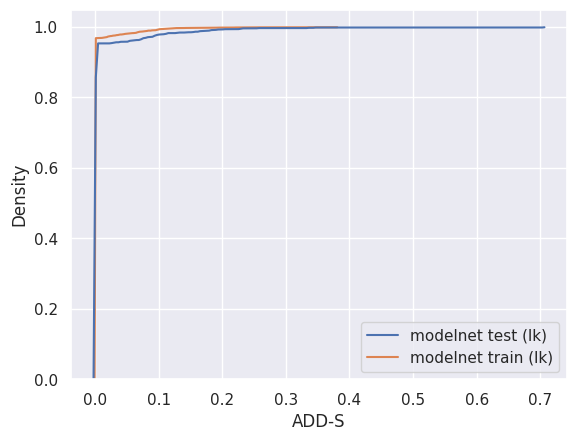

In [16]:
sns.kdeplot(conca, bw_adjust=0.1, cumulative=True, common_norm=False)
plt.xlabel('ADD-S')

In [17]:
sns.set(style="darkgrid")
rerr_data = dict()
for key in data.keys():
    df_ = pd.DataFrame(dict({key: data[key]["rerr"]}))
    rerr_data[key] = df_


In [18]:
conca = pd.concat([rerr_data[key].assign(dataset=key) for key in rerr_data.keys()])

Text(0.5, 0, 'Rotation Error (axis-angle, in rad)')

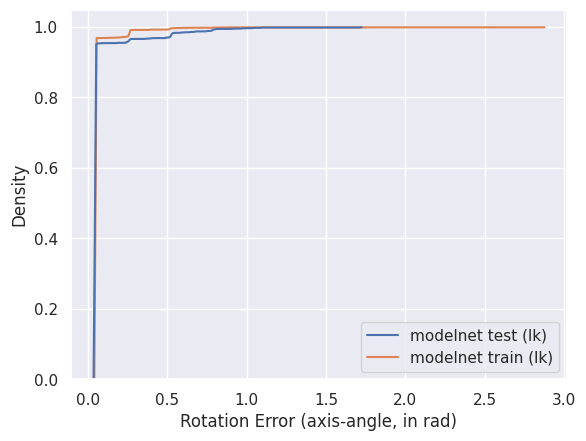

In [19]:
sns.kdeplot(conca, bw_adjust=0.1, cumulative=True, common_norm=False)
plt.xlabel('Rotation Error (axis-angle, in rad)')

In [20]:
sns.set(style="darkgrid")
terr_data = dict()
for key in data.keys():
    df_ = pd.DataFrame(dict({key: data[key]["terr"]}))
    terr_data[key] = df_


In [21]:
conca = pd.concat([terr_data[key].assign(dataset=key) for key in terr_data.keys()])

Text(0.5, 0, 'Translation Error')

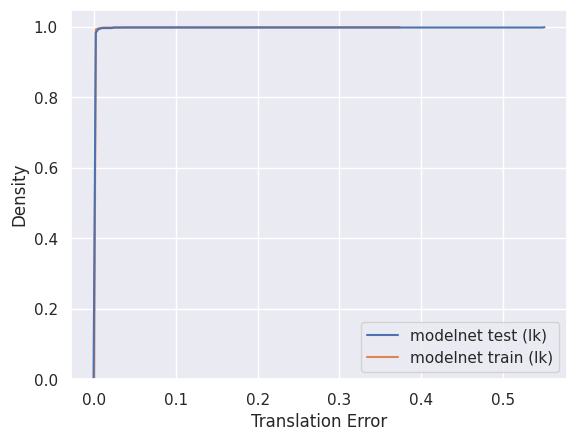

In [22]:
sns.kdeplot(conca, bw_adjust=0.1, cumulative=True, common_norm=False)
plt.xlabel('Translation Error')